In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:

data = pd.read_csv("telco.csv")


In [16]:
data.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [17]:
data.shape

(7043, 50)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [19]:
data.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                  

In [21]:
print(data.columns)

Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')


In [22]:
data.drop(columns=['Customer ID'], inplace=True)


data['Total Charges'] = pd.to_numeric(
    data['Total Charges'],
    errors='coerce'
)

data.dropna(inplace=True)
data.drop_duplicates(inplace=True)


In [24]:
data.isna().sum()

Gender                               0
Age                                  0
Under 30                             0
Senior Citizen                       0
Married                              0
Dependents                           0
Number of Dependents                 0
Country                              0
State                                0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Population                           0
Quarter                              0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security          

In [25]:
data.head()

,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
1,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,Female,78,No,Yes,Yes,Yes,1,United States,California,Inglewood,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,Female,80,No,Yes,Yes,Yes,1,United States,California,Whittier,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges
5,Female,72,No,Yes,No,Yes,1,United States,California,Pico Rivera,...,10,89.91,2235.41,1,Churned,Yes,95,4638,Competitor,Competitor had better devices


In [31]:
data.columns = data.columns.str.strip()

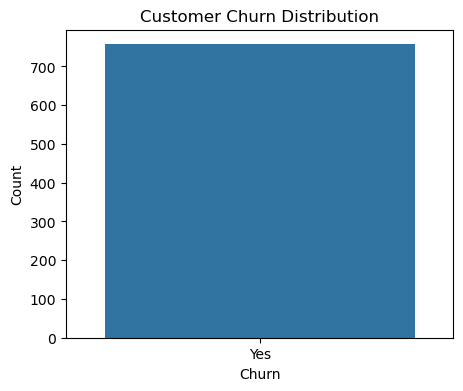

In [32]:
plt.figure(figsize=(5,4))
sns.countplot(data=data, x='Churn Label')
plt.title('Customer Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

Insight : Shows imbalance between churned vs retained customers

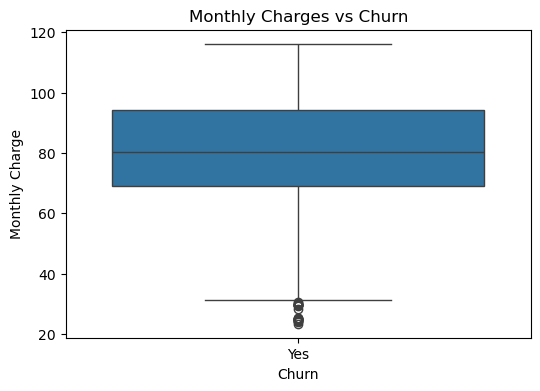

In [36]:
plt.figure(figsize=(6,4))
sns.boxplot(data=data, x='Churn Label', y='Monthly Charge')
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charge')
plt.show()


Insight : Churned customers usually have higher monthly charges.

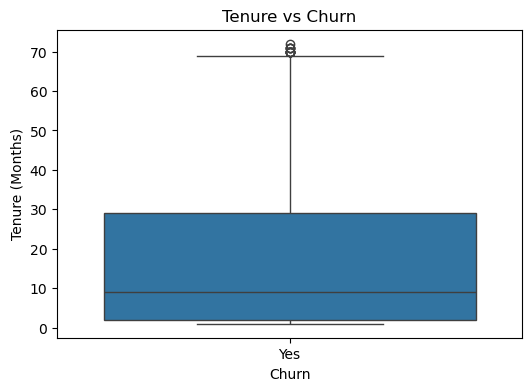

In [37]:
plt.figure(figsize=(6,4))
sns.boxplot(data=data, x='Churn Label', y='Tenure in Months')
plt.title('Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.show()


Insight : Customers with low tenure churn more.

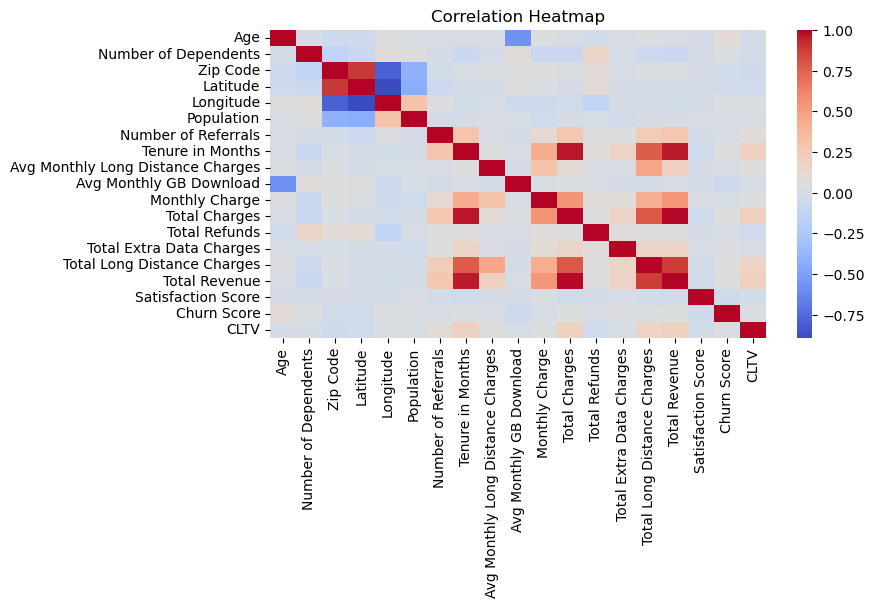

In [39]:
plt.figure(figsize=(8,4))

numeric_cols = data.select_dtypes(include=['int64', 'float64'])

sns.heatmap(
    numeric_cols.corr(),
    annot=False,
    cmap='coolwarm'
)

plt.title('Correlation Heatmap')
plt.show()

Insight : Helps identify features influencing churn (charges, tenure, revenue).

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [63]:
le = LabelEncoder()
for col in data.select_dtypes(include='object'):
    data[col] = le.fit_transform(data[col])

x= data.drop('Churn Label', axis=1)
y= data['Churn Label']


In [64]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [65]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [66]:
accuracy_score(y_test, rf.predict(X_test))

1.0

Conclusion:

This project focused on analyzing customer behavior using digital analytics techniques.
By performing data cleaning, exploratory data analysis, and visualization, key churn-related
patterns were identified.

A machine learning model was used to support analytical insights and validate observed trends.
The findings from this analysis can help businesses design better customer retention strategies.
